# what is svm

Support Vector Machine” (SVM) is a supervised learning machine learning algorithm that can be used for both classification or regression challenges. However, it is mostly used in classification problems, such as text classification. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have), with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the optimal hyper-plane that differentiates the two classes very well (look at the below snapshot).

# pros and cons of svm

Pros:

1. It works really well with a clear margin of separation.
2. It is effective in high-dimensional spaces.
3. It is effective in cases where the number of dimensions is greater than the number of samples.
4. It uses a subset of the training set in the decision function (called support vectors), so it is also memory efficient.

Cons:

1. It doesn’t perform well when we have a large data set because the required training time is higher.
2. It also doesn’t perform very well when the data set has more noise, i.e., target classes are overlapping.
3. SVM doesn’t directly provide probability estimates; these are calculated using an expensive five-fold cross-validation. It      is   included in the related SVC method of the Python scikit-learn library.

# faq

What is the support vector in the SVM algorithm?

1. The support vectors are the data points based on which the position of the hyperplane, which separates the different classes, depends.

What is the use of kernel in the SVM algorithm?

2.  Kernel can be used in SVM to transform the data, usually to the higher dimension, to find the optimal hyperplane.

What are the limitations of SVM??

3.  Since the time complexity of SVM is generally between O(n^2) and O(n^3), where ‘n’ is the number of data points, SVM is not   suitable for large data.

# lineaqr model pros and cons

pros

1. simple and easy to train
2. fast prediction
3. scale vary well to large datasets
4. work well with spaarse data
5. reason for prediction are relatively easy to interpret

cons

1. for lower dimentsonal data other model may have genralization performance
2. for classification data may not be linearly seperable (more on this in svms with non linear kernals)

<IPython.core.display.Javascript object>


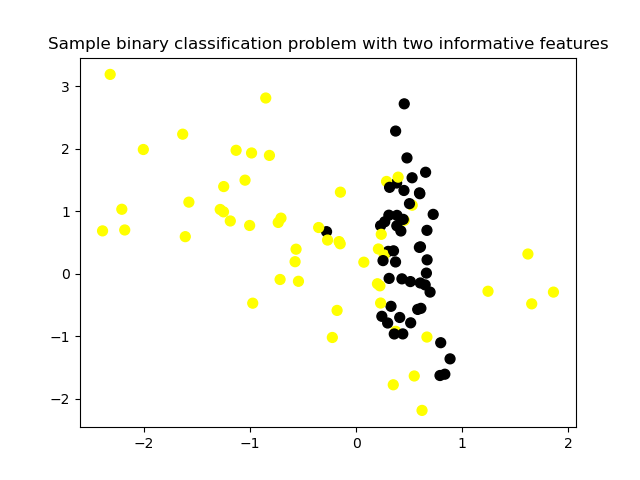

<IPython.core.display.Javascript object>


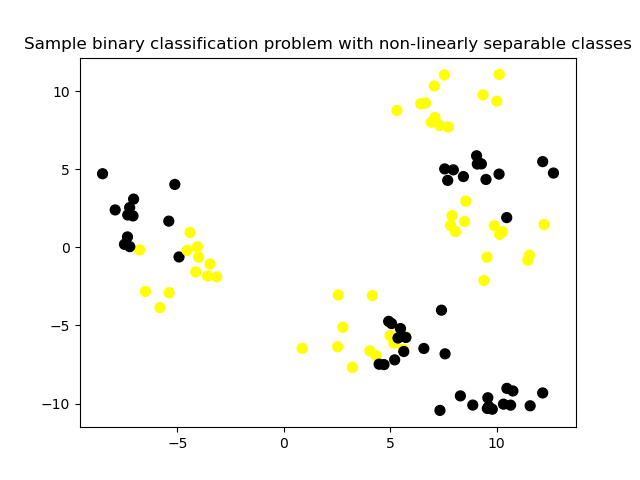

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


C:\Users\qw\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\qw\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [103]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


np.set_printoptions(precision=2)


fruits = pd.read_table('assets/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

<IPython.core.display.Javascript object>


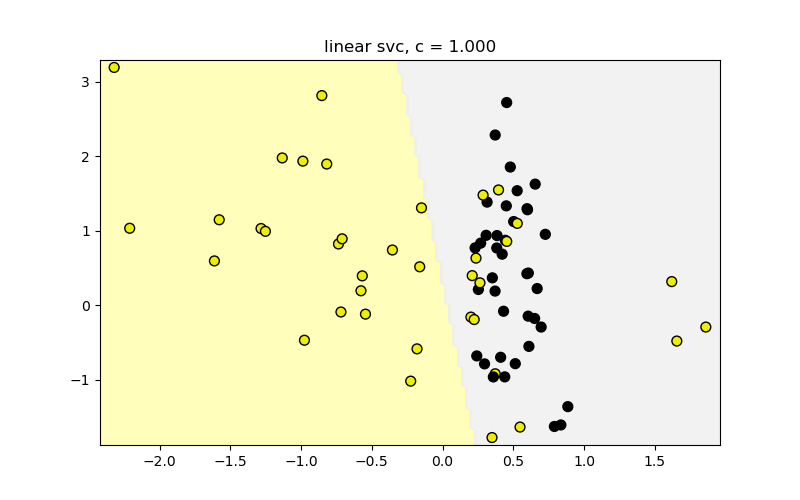

In [57]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1,1, figsize=(8,5))

this_c = 1.0
clf = SVC(kernel = 'linear',C= this_c,).fit(X_train, y_train)
title = 'linear svc, c = {:.3f}'.format(this_c)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,None, None,title,subaxes)

 Linear support vector macines : c parameter

<IPython.core.display.Javascript object>


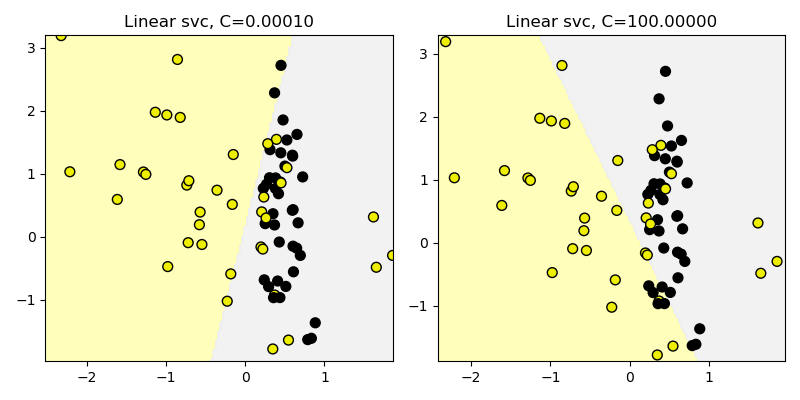

C:\Users\qw\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [68]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1,2,figsize=(8,4))
for this_c, subplot in zip([0.0001, 100], subaxes):
    clf = LinearSVC(C=this_c).fit(X_train,y_train)
    title = "Linear svc, C={:.5f}".format(this_c)
    plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,title,subplot)
plt.tight_layout()    

## application to real dataset

In [69]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = LinearSVC().fit(X_train, y_train)
print('breat cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of Linear SVC classifier on training set: {:.2f}'.format(clf.score(X_test,y_test)))

breat cancer dataset
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on training set: 0.94


C:\Users\qw\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## multi-class classification with linear model

#### linear svc with m classes generates m one vs rest classifier

In [75]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state=0)
    
clf = LinearSVC(C=5, random_state=67).fit(X_train,y_train)    
print("coeficient:\n", clf.coef_)
print("intercept:\n", clf.intercept_)

coeficient:
 [[-0.3   0.72]
 [-1.63  1.16]
 [ 0.01  0.43]
 [ 1.25 -1.64]]
intercept:
 [-3.29  1.2  -3.04  1.16]


C:\Users\qw\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### multi class result on the fruit datasets

<IPython.core.display.Javascript object>


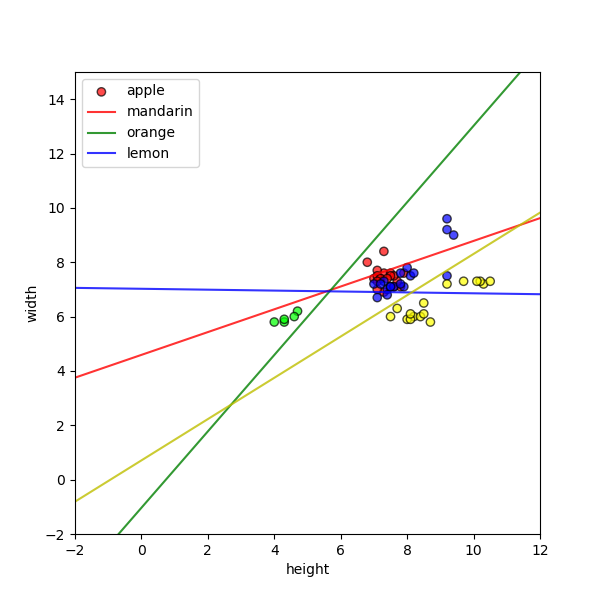

In [78]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])
plt.scatter(X_fruits[['height']], X_fruits_2d[['width']], c=y_fruits_2d,cmap=cmap_fruits,edgecolor='black',alpha=.7)

x_0_range = np.linspace(-10,15)
for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

##### what is non linear svm

When the data is not linearly separable then we can use Non-Linear SVM, which means when the data points cannot be separated 
into 2 classes by using a straight line (if 2D) then we use some advanced techniques like kernel tricks to classify them.
In most real-world applications we do not find linearly separable datapoints hence we use kernel trick to solve them.

#### pros and cons of kernalized svms

pros

1. can perform well on a range of dataset
2. Versatile different kernal function can be specified, or customk kernal can be defined for specific dataset
3. work well both low and high dimentional dataset

cons

1. efficiency(runtimespeed and storage usages) decrease as training set size increses (e.g. over 5000 samples)
2. need careful normalizing of input data and parameter tuning
3. does not provide probability estimate(but can be estimate using e.g. platte scalling)
4. difficult to interpret why a prediction was made 

##### kernal functions

1. polynominal kernal
2. sigmoid kernal(We can use it as the proxy for neural networks)
3. RBF kernal 
4. Bessel function kernal
5. Annova kernal

## Kernelized support vector machines

#### classification

<IPython.core.display.Javascript object>


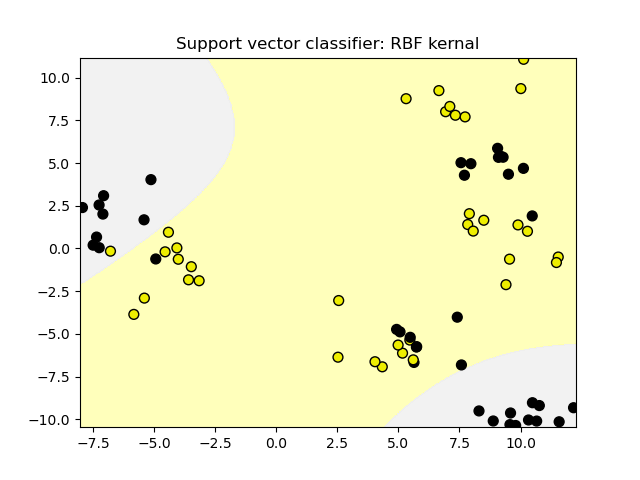

<IPython.core.display.Javascript object>


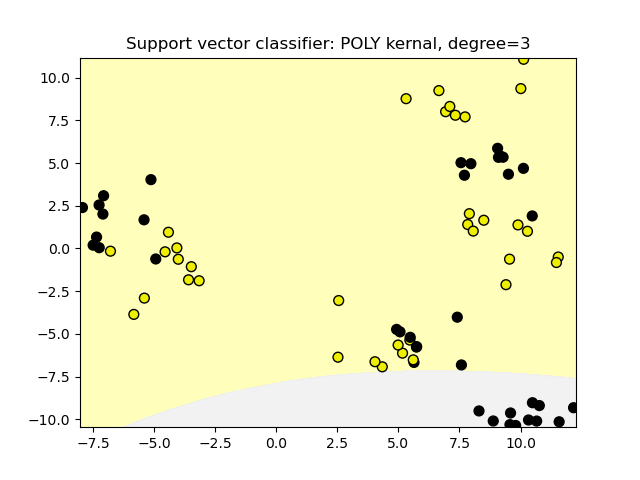

In [85]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

plot_class_regions_for_classifier(SVC().fit(X_train,y_train),X_train,y_train,None,None,
                                   'Support vector classifier: RBF kernal')
plot_class_regions_for_classifier(SVC(kernel='poly', degree=3).fit(X_train,y_train),X_train,y_train,None,None,
                                   'Support vector classifier: POLY kernal, degree=3')


#### svm with rbf kernal : gamma parameter

<IPython.core.display.Javascript object>


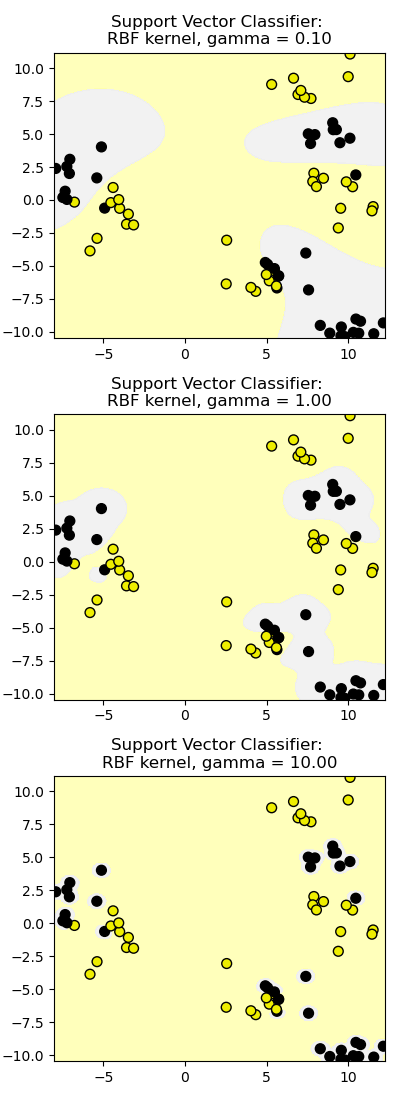

In [95]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

fig, subaxes = plt.subplots(3,1,figsize=(4,11))
for this_gamma, subplot in zip([0.1,1.0,10], subaxes):
    clf = SVC(kernel='rbf',gamma=this_gamma).fit(X_train,y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,title,subplot)
plt.tight_layout()    

<IPython.core.display.Javascript object>


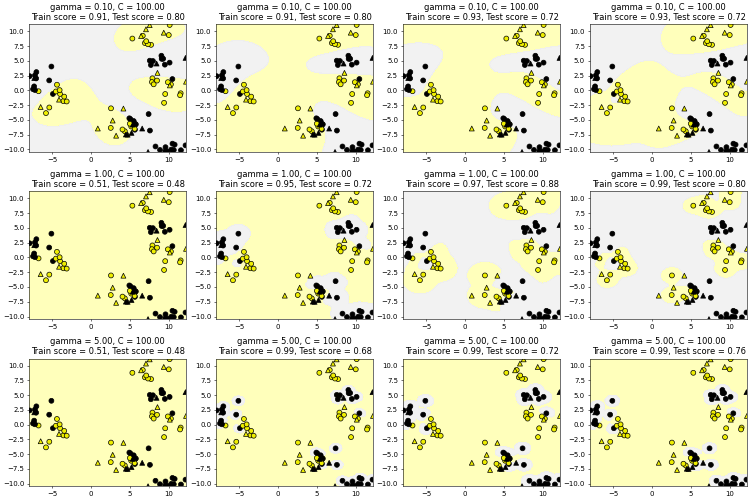

In [102]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.model_selection import train_test_split

from adspy_shared_utilities import plot_class_regions_for_classifier
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3,4,figsize=(15,10), dpi=50)

for this_gamma, this_axes in zip([0.1,1.0,5], subaxes):
    for this_c,  subplot in zip([0.1,1.0,15,100],this_axes):
        clf = SVC(kernel='rbf',gamma=this_gamma,C=this_c).fit(X_train,y_train)
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        plot_class_regions_for_classifier_subplot(clf,X_train,y_train,X_test,y_test,title,subplot)

        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)    

### application of svm to a real dataset: ubnnormalized data

In [104]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.92
Accuracy of RBF-kernel SVC on test set: 0.94


#### application of svms to a real datasets: normalized data with feature processing using MinMax scalling

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled,y_train)
print("breast cancer dataset normalizing with minmax scalling")
print("RBF-kernal svc (with mimmaxscaling) training set accuracy {:.2f}".format(clf.score(X_train_scaled,y_train)))
print("RBF- kernal svc (with minmaxscaling) test set accuracy {:.2f}".format(clf.score(X_test_scaled,y_test)))

breast cancer dataset normalizing with minmax scalling
RBF-kernal svc (with mimmaxscaling) training set accuracy 0.99
RBF- kernal svc (with minmaxscaling) test set accuracy 0.97


In [ ]:
The fit() method helps in fitting the training dataset into an estimator (ML algorithms).
The transform() helps in transforming the data into a more suitable form for the model.
The fit_transform() method combines the functionalities of both fit() and transform().